In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler

# Ridge Regression

## Example 1: Boston Housing

### Fetch Data and Main Parameters

In [3]:
# read data
df = pd.read_csv("https://raw.githubusercontent.com/askoshiyama/mli-cohort3/master/boston.csv")
df_onevar = df[["V6", "T1"]].copy()

# pass some parameters
target = ["T1"]

# generate folds
kf = KFold(n_splits=5, shuffle=True, random_state=10)

In [4]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,T1
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### Starting small - Ridge regression - One variable

[[0.87407977]
 [0.25700461]]
Fold             3.000000
Shrinkage     5000.000010
Train RMSE      23.454334
Test RMSE       23.400568
dtype: float64


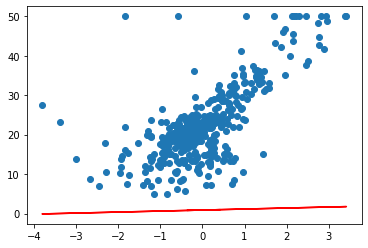

In [5]:
# pre-instantiation
df_metrics = pd.DataFrame(index=[0], columns=["Fold", "Shrinkage", "Train RMSE", "Test RMSE"])

# main loop
k, f = 0, 0
for (train, test) in kf.split(df_onevar):
    f += 1
    # separate variables and folds
    x_train = df_onevar.drop(labels=target, axis=1).values[train]
    x_test = df_onevar.drop(labels=target, axis=1).values[test]
    y_train = df_onevar[target].values[train]
    y_test = df_onevar[target].values[test]
    
    # scale variables
    scaler_x = StandardScaler().fit(x_train)
    x_train = np.hstack([np.ones((x_train.shape[0], 1)), scaler_x.transform(x_train)])
    x_test = np.hstack([np.ones((x_test.shape[0], 1)), scaler_x.transform(x_test)])
    
    # fit model
    # train model
    l = 5000.00001 # ridge shrinkage
    inv_component = np.linalg.inv(np.matmul(x_train.transpose(), x_train) + np.eye(x_train.shape[1]) * l * x_train.shape[1])
    coefs = np.matmul(inv_component, np.matmul(x_train.transpose(), y_train))

    # get predictions
    pred_train = np.matmul(x_train, coefs)
    pred_test = np.matmul(x_test, coefs)

    # compute metrics
    rmse_train = np.sqrt(np.mean((y_train - pred_train) ** 2.0))
    rmse_test = np.sqrt(np.mean((y_test - pred_test) ** 2.0))

    # store results
    df_metrics.loc[k, "Fold"] = f
    df_metrics.loc[k, "Shrinkage"] = l
    df_metrics.loc[k, "Train RMSE"] = rmse_train
    df_metrics.loc[k, "Test RMSE"] = rmse_test
    k += 1

# final organization
print(coefs)
print(df_metrics.astype(float).mean())
plt.scatter(x_train[:, 1], y_train)
plt.plot(x_train[:, 1], pred_train, color='red')
plt.show()

### Run Model - All Variables

In [6]:
# pre-instantiation
df_metrics = pd.DataFrame(index=[0], columns=["Fold", "Shrinkage", "Train RMSE", "Test RMSE"])
ridge_shrinkage = np.linspace(0.00001, 0.4, num=200)

# main loop
k, f = 0, 0
for (train, test) in kf.split(df):
    f += 1
    # separate variables and folds
    x_train = df.drop(labels=target, axis=1).values[train]
    x_test = df.drop(labels=target, axis=1).values[test]
    y_train = df[target].values[train]
    y_test = df[target].values[test]
    
    # scale  variables
    scaler_x = StandardScaler().fit(x_train)
    x_train = np.hstack([np.ones((x_train.shape[0], 1)), scaler_x.transform(x_train)])
    x_test = np.hstack([np.ones((x_test.shape[0], 1)), scaler_x.transform(x_test)])
    
    # fit model
    for l in ridge_shrinkage:
        # train model
        inv_component = np.linalg.inv(np.matmul(x_train.transpose(), x_train) + np.eye(x_train.shape[1]) * l * x_train.shape[1])
        coefs = np.matmul(inv_component, np.matmul(x_train.transpose(), y_train))
        
        # get predictions
        pred_train = np.matmul(x_train, coefs)
        pred_test = np.matmul(x_test, coefs)
        
        # compute metrics
        rmse_train = np.sqrt(np.mean((y_train - pred_train) ** 2.0))
        rmse_test = np.sqrt(np.mean((y_test - pred_test) ** 2.0))
        
        # store results
        df_metrics.loc[k, "Fold"] = f
        df_metrics.loc[k, "Shrinkage"] = l
        df_metrics.loc[k, "Train RMSE"] = rmse_train
        df_metrics.loc[k, "Test RMSE"] = rmse_test
        k += 1
        
        # if using sklearn: from sklearn.linear_model import Ridge
        #ml = Ridge(alpha=l).fit(x_train, y_train)
        #pred_train = ml.predict(x_train)
        #pred_test = ml.predict(x_test)

# final organization
df_metrics = df_metrics.astype(float)

### Charts

In [7]:
df_agg_metrics = df_metrics.pivot_table(index="Shrinkage", values=["Train RMSE", "Test RMSE"])

<AxesSubplot:xlabel='Shrinkage'>

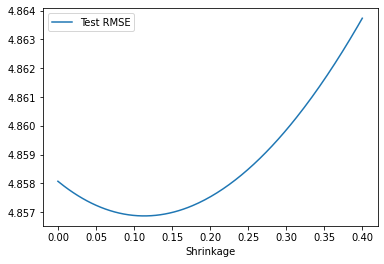

In [8]:
df_agg_metrics[["Test RMSE"]].plot()

In [9]:
df_agg_metrics.loc[df_agg_metrics["Test RMSE"].idxmin()]

Test RMSE     4.856875
Train RMSE    4.653663
Name: 0.11257, dtype: float64

## Example 2: Boston Housing with Polynomial Features

### Some new params

In [10]:
from sklearn.preprocessing import PolynomialFeatures
poly_params = {"degree": 1,
               "interaction_only": False,
               "include_bias": True
              }

In [11]:
poly_func = PolynomialFeatures(**poly_params).fit(df.drop(labels=target, axis=1))
x_train = poly_func.transform(df.drop(labels=target, axis=1))

In [12]:
x_train.shape

(506, 14)

In [13]:
df.drop(labels=target, axis=1).shape

(506, 13)

In [14]:
pd.DataFrame(np.matmul(x_train, x_train.transpose()))

,0,1,2,3,4,5,6,7,8,9,...,496,497,498,499,500,501,502,503,504,505
0,250047.124709,234705.864909,231909.497408,225707.646857,227169.171963,226353.877841,254018.154915,256493.637971,252722.420961,251775.497676,...,278494.313184,278312.335019,277960.399885,278054.402520,278906.718611,241346.961019,243784.430135,244704.796433,243228.543818,244046.071974
1,234705.864909,222840.306530,219778.703774,214423.672598,216010.197928,215256.164201,238047.661879,240955.568744,237282.826675,236089.749604,...,258568.700290,258325.945599,257896.032235,258111.503614,259045.573169,227703.265454,230242.305035,231344.034182,229848.209209,230555.329547
2,231909.497408,219778.703774,217077.201713,211992.611569,213408.278935,212585.525220,235193.165745,237536.464649,233780.602355,232904.025956,...,255551.789844,255386.258209,255056.886546,255119.513426,255942.908493,224833.509505,227219.938914,228085.360444,226629.405523,227466.046666
3,225707.646857,214423.672598,211992.611569,207573.495985,208862.096574,207965.753539,228637.872489,230525.234048,226679.711174,226033.482017,...,247285.744997,247163.104355,246915.537078,246848.367522,247579.798127,218974.358944,221253.868542,221903.958267,220467.164483,221438.809320
4,227169.171963,216010.197928,213408.278935,208862.096574,210232.145710,209366.897004,230125.931216,232280.130478,228469.740742,227674.643550,...,248850.406330,248691.679506,248396.804480,248401.090726,249185.396080,220468.712199,222821.726282,223583.842520,222126.919509,223038.225729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,241346.961019,227703.265454,224833.509505,218974.358944,220468.712199,219684.039962,245169.316353,247784.360810,244129.119658,243065.823453,...,268134.272723,267910.161402,267532.803743,267674.562152,268541.751107,233688.747258,236129.279622,237089.491968,235627.131162,236400.931481
502,243784.430135,230242.305035,227219.938914,221253.868542,222821.726282,222058.014868,247606.630833,250448.142305,246765.984839,245603.217958,...,270621.529813,270383.883386,269966.928426,270164.388007,271084.463335,236129.279622,238652.288735,239722.828456,238230.155479,238955.809563
503,244704.796433,231344.034182,228085.360444,221903.958267,223583.842520,222884.279546,248520.732012,251761.067716,248097.119195,246777.114964,...,271595.560707,271349.576083,270861.140502,271167.975837,272179.740939,237089.491968,239722.828456,241010.439153,239490.384972,240089.004177
504,243228.543818,229848.209209,226629.405523,220467.164483,222126.919509,221429.325315,247053.274434,250244.679911,246618.718944,245311.674530,...,270119.736078,269871.694124,269391.127895,269689.829800,270686.450283,235627.131162,238230.155479,239490.384972,237985.913418,238588.417839


### Starting small - Polynomial Ridge regression - One variable

[[18.04378019]
 [ 3.82252361]
 [ 4.24997113]
 [ 1.09257205]
 [-0.48940474]
 [-0.09016178]
 [ 0.0189447 ]]
Fold          3.000000
Shrinkage     5.000000
Train RMSE    6.166691
Test RMSE     6.511944
dtype: float64


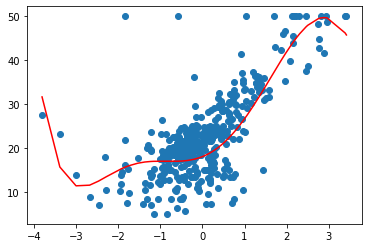

In [15]:
# pre-instantiation
df_metrics = pd.DataFrame(index=[0], columns=["Fold", "Shrinkage", "Train RMSE", "Test RMSE"])

# main loop
k, f = 0, 0
for (train, test) in kf.split(df):
    f += 1
    # separate variables and folds
    x_train = df_onevar.drop(labels=target, axis=1).values[train]
    x_test = df_onevar.drop(labels=target, axis=1).values[test]
    y_train = df_onevar[target].values[train]
    y_test = df_onevar[target].values[test]
    
    # scale variables
    scaler_x = StandardScaler().fit(x_train)
    x_train = scaler_x.transform(x_train)
    x_test = scaler_x.transform(x_test)
    
    # polynomial features - will include bias automatically
    poly_params = {"degree": 6,
                   "interaction_only": False,
                   "include_bias": True
                  }
    poly_func = PolynomialFeatures(**poly_params).fit(x_train)
    x_train = poly_func.transform(x_train)
    x_test = poly_func.transform(x_test)
        
    # fit model
    # train model
    l = 5.000 # ridge shrinkage
    inv_component = np.linalg.inv(np.matmul(x_train.transpose(), x_train) + np.eye(x_train.shape[1]) * l * x_train.shape[1])
    coefs = np.matmul(inv_component, np.matmul(x_train.transpose(), y_train))

    # get predictions
    pred_train = np.matmul(x_train, coefs)
    pred_test = np.matmul(x_test, coefs)

    # compute metrics
    rmse_train = np.sqrt(np.mean((y_train - pred_train) ** 2.0))
    rmse_test = np.sqrt(np.mean((y_test - pred_test) ** 2.0))

    # store results
    df_metrics.loc[k, "Fold"] = f
    df_metrics.loc[k, "Shrinkage"] = l
    df_metrics.loc[k, "Train RMSE"] = rmse_train
    df_metrics.loc[k, "Test RMSE"] = rmse_test
    k += 1

# final organization
print(coefs)
print(df_metrics.astype(float).mean())
indices = np.argsort(x_train[:, 1])
plt.scatter(x_train[indices, 1], y_train[indices])
plt.plot(x_train[indices, 1], pred_train[indices], color='red')
plt.show()

### Main Loop - All variables

In [16]:
# pre-instantiation
poly_params = {"degree": 2,
               "interaction_only": False,
               "include_bias": True
              }
df_metrics = pd.DataFrame(index=[0], columns=["Fold", "Shrinkage", "Train RMSE", "Test RMSE"])

# main loop
k, f = 0, 0
for (train, test) in kf.split(df):
    f += 1
    # separate variables and folds
    x_train = df.drop(labels=target, axis=1).values[train]
    x_test = df.drop(labels=target, axis=1).values[test]
    y_train = df[target].values[train]
    y_test = df[target].values[test]
    
    # scale variables
    scaler_x = StandardScaler().fit(x_train)
    x_train = scaler_x.transform(x_train)
    x_test = scaler_x.transform(x_test)
    
    # polynomial features - will include bias automatically
    poly_func = PolynomialFeatures(**poly_params).fit(x_train)
    x_train = poly_func.transform(x_train)
    x_test = poly_func.transform(x_test)
        
    # fit model
    for l in ridge_shrinkage:
        # train model
        inv_component = np.linalg.inv(np.matmul(x_train.transpose(), x_train) + np.eye(x_train.shape[1]) * l * x_train.shape[1])
        coefs = np.matmul(inv_component, np.matmul(x_train.transpose(), y_train))
        
        # get predictions
        pred_train = np.matmul(x_train, coefs)
        pred_test = np.matmul(x_test, coefs)
        
        # compute metrics
        rmse_train = np.sqrt(np.mean((y_train - pred_train) ** 2.0))
        rmse_test = np.sqrt(np.mean((y_test - pred_test) ** 2.0))
        
        # store results
        df_metrics.loc[k, "Fold"] = f
        df_metrics.loc[k, "Shrinkage"] = l
        df_metrics.loc[k, "Train RMSE"] = rmse_train
        df_metrics.loc[k, "Test RMSE"] = rmse_test
        k += 1
        
        # if using sklearn: from sklearn.linear_model import Ridge
        #ml = Ridge(alpha=l).fit(x_train, y_train)
        #pred_train = ml.predict(x_train)
        #pred_test = ml.predict(x_test)
    print(f)

# final organization
df_metrics = df_metrics.astype(float)

1
2
3
4
5


### Charts

In [17]:
df_agg_metrics = df_metrics.pivot_table(index="Shrinkage", values=["Train RMSE", "Test RMSE"])

<AxesSubplot:xlabel='Shrinkage'>

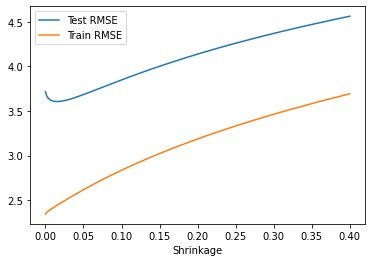

In [18]:
df_agg_metrics.plot()

In [19]:
df_agg_metrics.loc[df_agg_metrics["Test RMSE"].idxmin()]

Test RMSE     3.604989
Train RMSE    2.447062
Name: 0.01609, dtype: float64

# Kernel Ridge Regression

## Example 1: Boston Housing with Polynomial Kernel

In [20]:
from sklearn.kernel_ridge import KernelRidge
import time

In [21]:
def poly_kernel(X, degree):
    return (np.matmul(X, X.transpose())) ** degree
    # return (np.matmul(X, X.transpose()) + 1.0) ** degree  # K(X, Y) = (gamma <X, Y> + coef0)^degree (sklearn implementation)
    # return (np.eye(X.shape[0]) + np.matmul(X, X.transpose())) ** degree  # anova dot-kernel - try it later if you are interested

# passing some parameters
krr_degree = 2
krr_shrinkage = np.linspace(0.00001, 0.4, num=200) # np.linspace(1.0, 10.0, num=200) 

In [22]:
# pre-instantiation
df_metrics = pd.DataFrame(index=[0], columns=["Fold", "Shrinkage", "Train RMSE", "Test RMSE"])

# main loop
k, f = 0, 0
for (train, test) in kf.split(df):
    f += 1
    # separate variables and folds
    x_train = df.drop(labels=target, axis=1).values[train]
    x_test = df.drop(labels=target, axis=1).values[test]
    y_train = df[target].values[train]
    y_test = df[target].values[test]
    
    # scaling variables
    scaler_x = StandardScaler().fit(x_train)
    x_train = scaler_x.transform(x_train)
    x_test = scaler_x.transform(x_test)
    
    # creating kernel matrix
    x_data = np.hstack([np.ones((df.shape[0], 1)), np.vstack([x_train, x_test])])
    
    # x_data = np.vstack([x_train, x_test]) # no intercept
    K = poly_kernel(x_data, krr_degree)
    
    # splitting kernel matrix in training an test
    # remember: K = |k(x_train, x_train), k(x_test, x_train) |
    #               |k(x_train, x_test), k(x_test, x_test)   |
    # we train using k(x_train, x_train) block, and test using k(x_train, x_test) block
    k_train = K[:x_train.shape[0], :x_train.shape[0]]
    k_test = K[x_train.shape[0]:, :x_train.shape[0]]
        
    # fit model
    for l in krr_shrinkage:
        # train model
        inv_component = np.linalg.inv(k_train + np.eye(x_train.shape[0]) * l * x_train.shape[0])
        coefs = np.matmul(inv_component, y_train)
                
        # get predictions
        pred_train = np.matmul(k_train, coefs) # X*Xt * alpha = K * alpha
        pred_test = np.matmul(k_test, coefs) # X*Xt * alpha = K * alpha
        
        # compute metrics
        rmse_train = np.sqrt(np.mean((y_train - pred_train) ** 2.0))
        rmse_test = np.sqrt(np.mean((y_test - pred_test) ** 2.0))
        
        # store results
        df_metrics.loc[k, "Fold"] = f
        df_metrics.loc[k, "Shrinkage"] = l
        df_metrics.loc[k, "Train RMSE"] = rmse_train
        df_metrics.loc[k, "Test RMSE"] = rmse_test
        k += 1
        
        # if using sklearn: from sklearn.linear_model import Ridge
        #ml = KernelRidge(kernel="poly", degree=krr_degree, alpha=l).fit(x_train, y_train)
        #pred_train = ml.predict(x_train)
        #pred_test = ml.predict(x_test)
    print(f)

# final organization
df_metrics = df_metrics.astype(float)

1
2
3
4
5


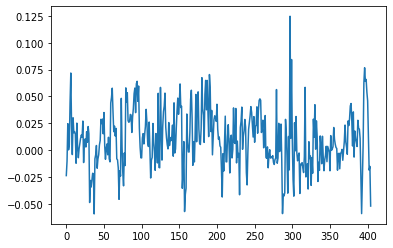

In [23]:
plt.plot(coefs)

(array([ 13.,  19.,  91., 121.,  86.,  44.,  26.,   4.,   0.,   1.]),
 array([-0.0594136 , -0.04099946, -0.02258531, -0.00417117,  0.01424297,
         0.03265712,  0.05107126,  0.0694854 ,  0.08789955,  0.10631369,
         0.12472784]),
 <BarContainer object of 10 artists>)

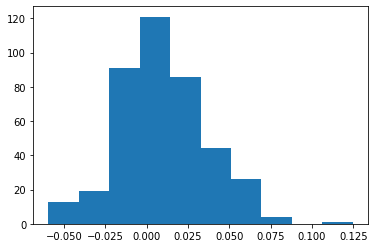

In [24]:
plt.hist(coefs)

### Charts

In [25]:
df_agg_metrics = df_metrics.pivot_table(index="Shrinkage", values=["Train RMSE", "Test RMSE"])

<AxesSubplot:xlabel='Shrinkage'>

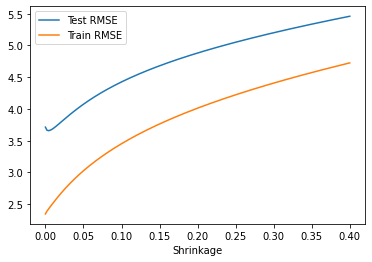

In [26]:
df_agg_metrics.plot()

In [27]:
df_agg_metrics.loc[df_agg_metrics["Test RMSE"].idxmin()]

Test RMSE     3.658530
Train RMSE    2.423782
Name: 0.00403, dtype: float64

## Example 2: Boston Housing with Gaussian/RBF Kernel

#### Feature space of polynomial or linear kernels are finite, whilst Gaussian/RBF kernel induces a feature space of infinite dimension: https://en.wikipedia.org/wiki/Radial_basis_function_kernel

### Initial Params

In [28]:
def rbf_kernel(X, sigma):
    from sklearn.metrics.pairwise import euclidean_distances
    K = euclidean_distances(X, X, squared=True)
    K *= -sigma # 1.0 / (2.0 * sigma)
    return np.exp(K, K)  # exponentiate K in-place
    
# passing some parameters
krr_sigma = 2.0
krr_shrinkage = np.linspace(0.00001, 0.4, num=200)

### Just with one variable

Fold          3.000000
Shrinkage     0.001000
Train RMSE    5.579747
Test RMSE     6.736537
dtype: float64


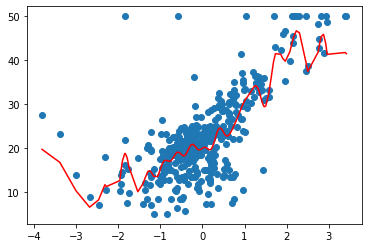

In [29]:
# pre-instantiation
df_metrics = pd.DataFrame(index=[0], columns=["Fold", "Shrinkage", "Train RMSE", "Test RMSE"])

# main loop
k, f = 0, 0
for (train, test) in kf.split(df_onevar):
    f += 1
    # separate variables and folds
    x_train = df_onevar.drop(labels=target, axis=1).values[train]
    x_test = df_onevar.drop(labels=target, axis=1).values[test]
    y_train = df_onevar[target].values[train]
    y_test = df_onevar[target].values[test]
    
    # scaling variables
    scaler_x = StandardScaler().fit(x_train)
    x_train = scaler_x.transform(x_train)
    x_test = scaler_x.transform(x_test)
    
    # creating kernel matrix
    krr_sigma = 20.0
    x_data = np.hstack([np.ones((df.shape[0], 1)), np.vstack([x_train, x_test])])
    K = rbf_kernel(x_data, krr_sigma)
    
    # splitting kernel matrix in training an test
    # remember: K = |k(x_train, x_train), k(x_test, x_train) |
    #               |k(x_train, x_test), k(x_test, x_test)   |
    # we train using k(x_train, x_train) block, and test using k(x_train, x_test) block
    k_train = K[:x_train.shape[0], :x_train.shape[0]]
    k_test = K[x_train.shape[0]:, :x_train.shape[0]]
        
    # fit model
    # train model
    l = 0.0010
    inv_component = np.linalg.inv(k_train + np.eye(x_train.shape[0]) * l * x_train.shape[0])
    coefs = np.matmul(inv_component, y_train)

    # get predictions
    pred_train = np.matmul(k_train, coefs)
    pred_test = np.matmul(k_test, coefs)

    # compute metrics
    rmse_train = np.sqrt(np.mean((y_train - pred_train) ** 2.0))
    rmse_test = np.sqrt(np.mean((y_test - pred_test) ** 2.0))

    # store results
    df_metrics.loc[k, "Fold"] = f
    df_metrics.loc[k, "Shrinkage"] = l
    df_metrics.loc[k, "Train RMSE"] = rmse_train
    df_metrics.loc[k, "Test RMSE"] = rmse_test
    k += 1

# final organization
#print(coefs)
print(df_metrics.astype(float).mean())
indices = np.argsort(x_train[:, 0])
plt.scatter(x_train[indices, 0], y_train[indices])
plt.plot(x_train[indices, 0], pred_train[indices], color='red')
plt.show()

In [30]:
K

array([[1.00000000e+00, 3.95426101e-01, 4.76456988e-07, ...,
        5.59476184e-06, 7.90382325e-06, 3.03841263e-04],
       [3.95426101e-01, 1.00000000e+00, 1.21062377e-10, ...,
        1.79617734e-03, 2.30431309e-03, 2.88861504e-02],
       [4.76456988e-07, 1.21062377e-10, 1.00000000e+00, ...,
        7.96440669e-24, 1.64828146e-23, 5.36445347e-20],
       ...,
       [5.59476184e-06, 1.79617734e-03, 7.96440669e-24, ...,
        1.00000000e+00, 9.97499394e-01, 6.70942162e-01],
       [7.90382325e-06, 2.30431309e-03, 1.64828146e-23, ...,
        9.97499394e-01, 1.00000000e+00, 7.12940937e-01],
       [3.03841263e-04, 2.88861504e-02, 5.36445347e-20, ...,
        6.70942162e-01, 7.12940937e-01, 1.00000000e+00]])

### Main Loop

In [31]:
# pre-instantiation
df_metrics = pd.DataFrame(index=[0], columns=["Fold", "Shrinkage", "Train RMSE", "Test RMSE"])
krr_shrinkage = np.linspace(0.00001, 0.4, num=200)

# main loop
k, f = 0, 0
for (train, test) in kf.split(df):
    f += 1
    # separate variables and folds
    x_train = df.drop(labels=target, axis=1).values[train]
    x_test = df.drop(labels=target, axis=1).values[test]
    y_train = df[target].values[train]
    y_test = df[target].values[test]
    
    # scaling variables
    scaler_x = StandardScaler().fit(x_train)
    x_train = scaler_x.transform(x_train)
    x_test = scaler_x.transform(x_test)
    
    # creating kernel matrix
    x_data = np.hstack([np.ones((df.shape[0], 1)), np.vstack([x_train, x_test])])
    krr_sigma = .5
    K = rbf_kernel(x_data, krr_sigma)
    
    # splitting kernel matrix in training an test
    # remember: K = |k(x_train, x_train), k(x_test, x_train) |
    #               |k(x_train, x_test), k(x_test, x_test)   |
    # we train using k(x_train, x_train) block, and test using k(x_train, x_test) block
    k_train = K[:x_train.shape[0], :x_train.shape[0]]
    k_test = K[x_train.shape[0]:, :x_train.shape[0]]
        
    # fit model
    for l in krr_shrinkage:
        # train model
        inv_component = np.linalg.inv(k_train + np.eye(x_train.shape[0]) * l * x_train.shape[0])
        coefs = np.matmul(inv_component, y_train)
                
        # get predictions
        pred_train = np.matmul(k_train, coefs)
        pred_test = np.matmul(k_test, coefs)
        
        # compute metrics
        rmse_train = np.sqrt(np.mean((y_train - pred_train) ** 2.0))
        rmse_test = np.sqrt(np.mean((y_test - pred_test) ** 2.0))
        
        # store results
        df_metrics.loc[k, "Fold"] = f
        df_metrics.loc[k, "Shrinkage"] = l
        df_metrics.loc[k, "Train RMSE"] = rmse_train
        df_metrics.loc[k, "Test RMSE"] = rmse_test
        k += 1
        
        # if using sklearn: from sklearn.linear_model import Ridge
        #ml = KernelRidge(kernel="rbf", degree=krr_sigma, alpha=l).fit(x_train, y_train)
        #pred_train = ml.predict(x_train)
        #pred_test = ml.predict(x_test)
    print(f)

# final organization
df_metrics = df_metrics.astype(float)

1
2
3
4
5


In [32]:
K

array([[1.        , 0.15270987, 0.14223194, ..., 0.01534427, 0.01100986,
        0.0035791 ],
       [0.15270987, 1.        , 0.35635746, ..., 0.08517965, 0.08995685,
        0.06885796],
       [0.14223194, 0.35635746, 1.        , ..., 0.01569633, 0.01044034,
        0.01656775],
       ...,
       [0.01534427, 0.08517965, 0.01569633, ..., 1.        , 0.85594243,
        0.34614967],
       [0.01100986, 0.08995685, 0.01044034, ..., 0.85594243, 1.        ,
        0.33019682],
       [0.0035791 , 0.06885796, 0.01656775, ..., 0.34614967, 0.33019682,
        1.        ]])

### Charts

In [33]:
df_agg_metrics = df_metrics.pivot_table(index="Shrinkage", values=["Train RMSE", "Test RMSE"])

<AxesSubplot:xlabel='Shrinkage'>

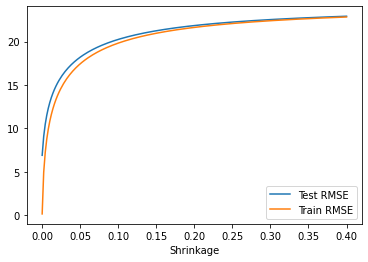

In [34]:
df_agg_metrics.plot()

In [35]:
df_agg_metrics.loc[df_agg_metrics["Test RMSE"].idxmin()]

Test RMSE     6.902539
Train RMSE    0.157527
Name: 1e-05, dtype: float64

<AxesSubplot:>

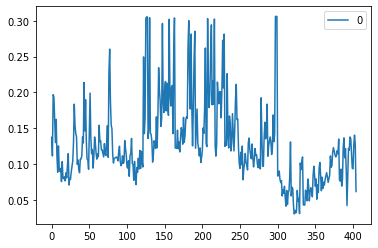

In [36]:
pd.DataFrame(coefs).plot()

# Support Vector Machines

## Linearly separable problem

### Dataset

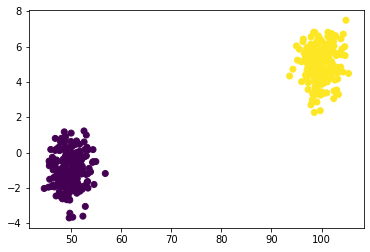

In [37]:
# linearly separable problem
class_plus1 = np.hstack([np.random.normal(loc=[100.0, 5.0], scale=[2.0, 1.0], size=(200, 2)), np.ones((200, 1))])
class_minus1 = np.hstack([np.random.normal(loc=[50.0, -1.0], scale=[2.0, 1.0], size=(200, 2)), -np.ones((200, 1))])
df = pd.DataFrame(np.vstack([class_plus1, class_minus1]), columns=["X", "Z", "Y"])

# plot
plt.scatter(df["X"], df["Z"], c=df["Y"])

### Model

In [38]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
# not scaled
svm_unscaled = Pipeline(( ("scaler", StandardScaler(with_mean=False, with_std=False)),
                       ("linear_svc", LinearSVC(loss="hinge", C=10.0 ** -10.0)),
                      ))
svm_unscaled = svm_unscaled.fit(df[["X", "Z"]].values, df["Y"].values)

# with scaling
svm_scaled = Pipeline(( ("scaler", StandardScaler()),
                       ("linear_svc", LinearSVC(loss="hinge", C=10.0 ** -10.0)),
                      ))
svm_scaled = svm_scaled.fit(df[["X", "Z"]].values, df["Y"].values)

### Charts - Sensitivity to feature scales

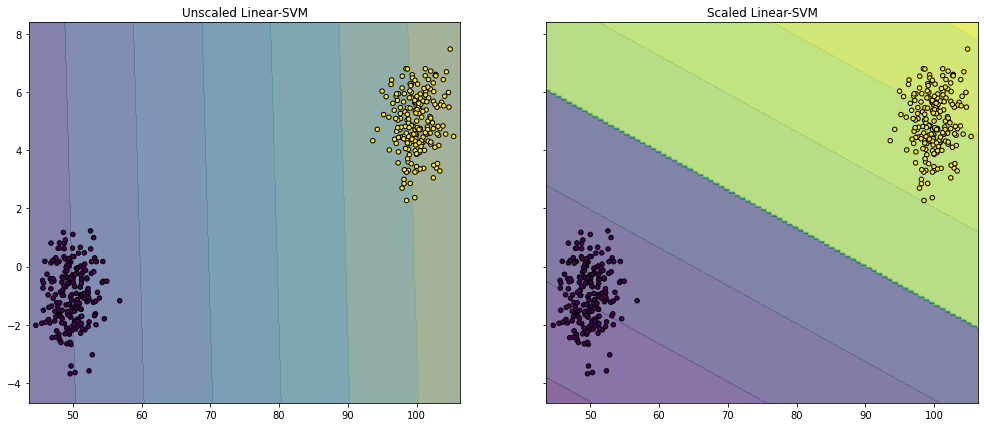

In [39]:
from itertools import product
# Instantiation
x_min, x_max = df["X"].min() - 1, df["X"].max() + 1
z_min, z_max = df["Z"].min() - 1, df["Z"].max() + 1
xx, zz = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(z_min, z_max, 0.1))
f, axarr = plt.subplots(nrows=1, ncols=2, sharex='col', sharey='row', figsize=(17, 7))

# Plotting decision regions
for idx, clf, tt in zip(product([0, 1]), [svm_unscaled, svm_scaled], ["Unscaled Linear-SVM", "Scaled Linear-SVM"]):

    Z = clf.decision_function(np.c_[xx.ravel(), zz.ravel()])
    Z = Z.reshape(xx.shape)
    axarr[idx[0]].contourf(xx, zz, Z, alpha=0.4)
    Z = clf.predict(np.c_[xx.ravel(), zz.ravel()])
    Z = Z.reshape(xx.shape)
    axarr[idx[0]].contourf(xx, zz, Z, alpha=0.4)
    axarr[idx[0]].scatter(df["X"].values, df["Z"].values, c=df["Y"].values, s=20, edgecolor='k')
    axarr[idx[0]].set_title(tt)

## Soft Margin

### Dataset

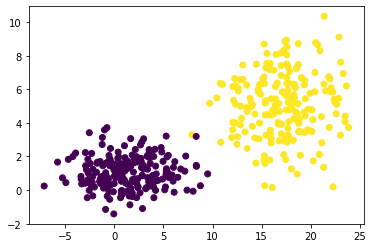

In [40]:
# linearly separable problem, but with outliers
np.random.seed(seed=119)
class_plus1 = np.hstack([np.random.normal(loc=[17.0, 5.0], scale=[3.0, 2.0], size=(200, 2)), np.ones((200, 1))])
class_minus1 = np.hstack([np.random.normal(loc=[1.0, 1.0], scale=[3.0, 1.0], size=(200, 2)), -np.ones((200, 1))])
df = pd.DataFrame(np.vstack([class_plus1, class_minus1]), columns=["X", "Z", "Y"])

# plot
plt.scatter(df["X"], df["Z"], c=df["Y"])

### Model

In [41]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
# different penalties
C = [0.0000001, 0.0001, 10.0]

# different models
svm_c = []
for c in C:
    svm_c.append(Pipeline(( ("scaler", StandardScaler()),
                           ("linear_svc", LinearSVC(loss="hinge", C=c)),
                          ))
                )
    svm_c[-1].fit(df[["X", "Z"]].values, df["Y"].values)

### Charts - Fewer vs More margin violations

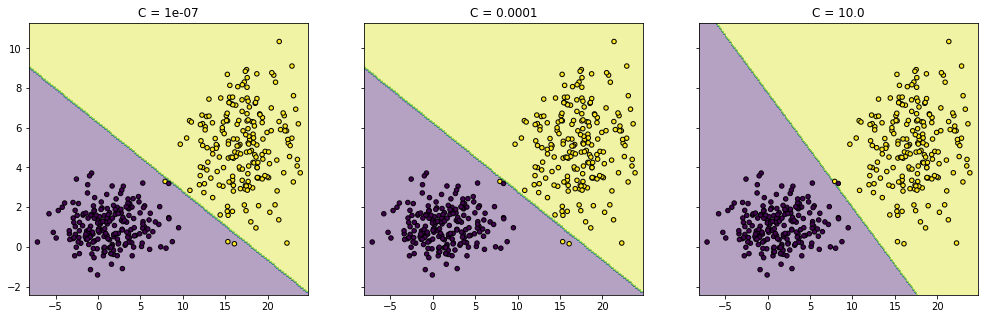

In [42]:
from itertools import product
# Instantiation
x_min, x_max = df["X"].min() - 1, df["X"].max() + 1
z_min, z_max = df["Z"].min() - 1, df["Z"].max() + 1
xx, zz = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(z_min, z_max, 0.1))
f, axarr = plt.subplots(nrows=1, ncols=3, sharex='col', sharey='row', figsize=(17, 5))

# Plotting decision regions
for idx, clf, tt in zip(product([0, 1, 2]), svm_c, ["C = " + str(c) for c in C]):

    Z = clf.predict(np.c_[xx.ravel(), zz.ravel()])
    Z = Z.reshape(xx.shape)
    axarr[idx[0]].contourf(xx, zz, Z, alpha=0.4)
    axarr[idx[0]].scatter(df["X"].values, df["Z"].values, c=df["Y"].values, s=20, edgecolor='k')
    axarr[idx[0]].set_title(tt)

## Linear Support Vector Machines with Explicit Feature Map

### Dataset

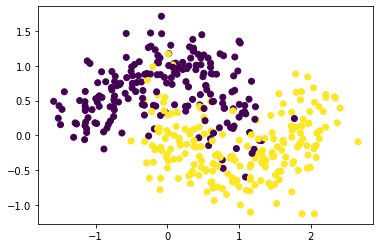

In [43]:
# linearly separable problem, but with outliers
from sklearn.datasets import make_moons
np.random.seed(seed=119)
df = make_moons(n_samples=400, noise=0.3, random_state=0)
df = pd.DataFrame({"X": df[0][:, 0],
                   "Z": df[0][:, 1],
                   "Y": df[1]})

# plot
plt.scatter(df["X"], df["Z"], c=df["Y"])

### Model

In [44]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
# different penalties
degree = [1, 3, 7]

# different models
svm_d = []
for d in degree:
    svm_d.append(Pipeline((("poly_features", PolynomialFeatures(degree=d)),
                            ("scaler", StandardScaler()),
                           ("linear_svc", LinearSVC(loss="hinge", C=0.10)),
                          ))
                )
    svm_d[-1].fit(df[["X", "Z"]].values, df["Y"].values)

### Charts - Nonlinear decision boundary

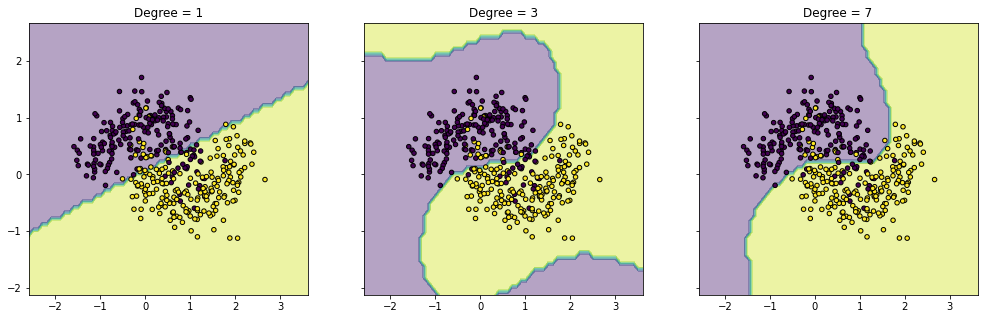

In [45]:
from itertools import product
# Instantiation
x_min, x_max = df["X"].min() - 1, df["X"].max() + 1
z_min, z_max = df["Z"].min() - 1, df["Z"].max() + 1
xx, zz = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(z_min, z_max, 0.1))
f, axarr = plt.subplots(nrows=1, ncols=3, sharex='col', sharey='row', figsize=(17, 5))

# Plotting decision regions
for idx, clf, tt in zip(product([0, 1, 2]), svm_d, ["Degree = " + str(d) for d in degree]):

    Z = clf.predict(np.c_[xx.ravel(), zz.ravel()])
    Z = Z.reshape(xx.shape)
    axarr[idx[0]].contourf(xx, zz, Z, alpha=0.4)
    axarr[idx[0]].scatter(df["X"].values, df["Z"].values, c=df["Y"].values, s=20, edgecolor='k')
    axarr[idx[0]].set_title(tt)

## Kernel SVM

### Dataset - Harder to separate...

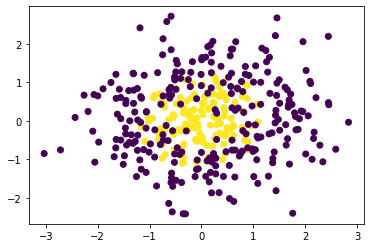

In [46]:
# nonlinearly separable problem
np.random.seed(seed=119)
class_data = np.random.normal(loc=[0.0, 0.0], scale=[1.0, 1.0], size=(400, 2))
class_pos = (class_data[:, 0] ** 2.0 + class_data[:, 1] ** 2.0) < np.random.uniform(low=0.0, high=2., size=400)
class_plus1 = class_data[class_pos, :]
class_minus1 = class_data[class_pos == False, :]
df = pd.DataFrame(np.vstack([np.hstack([class_plus1, np.ones((class_plus1.shape[0], 1))]), 
                            np.hstack([class_minus1, -np.ones((class_minus1.shape[0], 1))])]), columns=["X", "Z", "Y"])

# plot
plt.scatter(df["X"], df["Z"], c=df["Y"])

### Model

In [47]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
# different penalties
sigma = [1., 10.0, 100.0]

# different models
svm_s = []
for s in sigma:
    svm_s.append(Pipeline((("scaler", StandardScaler()),
                           ("kernel_svc", SVC(kernel="rbf", gamma=s, C=10.0)),
                          ))
                )
    svm_s[-1].fit(df[["X", "Z"]].values, df["Y"].values)

### Charts - Hard to separate

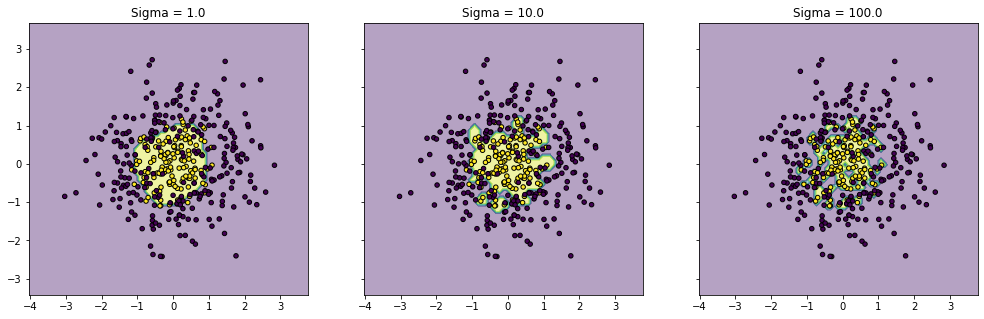

In [48]:
from itertools import product
# Instantiation
x_min, x_max = df["X"].min() - 1, df["X"].max() + 1
z_min, z_max = df["Z"].min() - 1, df["Z"].max() + 1
xx, zz = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(z_min, z_max, 0.1))
f, axarr = plt.subplots(nrows=1, ncols=3, sharex='col', sharey='row', figsize=(17, 5))

# Plotting decision regions
for idx, clf, tt in zip(product([0, 1, 2]), svm_s, ["Sigma = " + str(s) for s in sigma]):

    Z = clf.predict(np.c_[xx.ravel(), zz.ravel()])
    Z = Z.reshape(xx.shape)
    axarr[idx[0]].contourf(xx, zz, Z, alpha=0.4)
    axarr[idx[0]].scatter(df["X"].values, df["Z"].values, c=df["Y"].values, s=20, edgecolor='k')
    axarr[idx[0]].set_title(tt)

### Accuracy

In [49]:
np.mean(svm_s[0].predict(df[["X", "Z"]]) == df["Y"])

0.8225

## Training a Support Vector Machine in the Primal

In [50]:
# homework: https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.129.3368&rep=rep1&type=pdf
# produce 2-3 slides presenting the methodology in section 4.1 and algorithm 1

### Data and Parameters

In [51]:
# data
X = df[["X", "Z"]].values
Y = df[["Y"]].values
gaus_sigma = 1.00
C = 10.0

# pre-instantiation
K = rbf_kernel(X, gaus_sigma)
old_sv = np.zeros(df.shape[0]) == 1
new_sv = np.ones(df.shape[0]) == 1
sv_coefs = np.zeros((df.shape[0], 1))
all_coefs = np.zeros((df.shape[0], 1))

### Train model

In [52]:
# fit model
while (np.mean(np.abs(old_sv*1.0 - new_sv*1.0)) > 0.00001):
    # new becomes old
    old_sv = np.copy(new_sv)
    
    # first part of the algorithm - compute coefficients only for the support vectors
    inv_component = np.linalg.inv(K[old_sv, :][:, old_sv] + np.eye(X.shape[0])[old_sv, :][:, old_sv] * 1/C)
    sv_coefs = np.matmul(inv_component, Y[old_sv, :])
    
    # store the coefficients for the support vectors, all the rest are zeros
    all_coefs[old_sv] = sv_coefs
    all_coefs[old_sv==0] = 0
    
    # find new support vectors
    new_sv = ((Y * np.matmul(K, all_coefs)) < 1.0).reshape(1, -1)[0]
    
    # proportion of support vectors in the data
    print(new_sv.mean())

0.825
0.7425
0.6975
0.6875
0.6825
0.6825


### Accuracy

In [53]:
np.mean(np.sign(np.matmul(K, all_coefs)) == Y)

0.8225